# Visualisation — Matplotlib and Seaborn Fundamentals
This notebook will introduce the basic functions of matplotlib and seaborn (which is built on matplotlib). The data used is mostly synthetic, with the exception of the wine-dataset used in one part (imported from sklearn)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets



In [14]:
# plotting defaults for a presentation
# explore on the first graph how the plot changes when you switch the context to e.g. "paper" or "poster"
sns.set_theme(style='whitegrid', context='talk')
plt.rcParams['figure.dpi'] = 120

## Enzyme kinetics

In [15]:
# load generated dataset
enzyme_kinetics_df = pd.read_csv("enzyme_kinetics_df.csv")
enzyme_kinetics_df.head()

,enzyme,replicate,substrate_mM,rate
0,Enzyme_1,1,0.010000,-5.438464
1,Enzyme_1,1,0.050000,NaN
2,Enzyme_1,1,0.772727,28.823510
3,Enzyme_1,1,0.918182,29.049695
4,Enzyme_1,1,1.495455,42.965803


In [16]:
enzyme_kinetics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   enzyme        192 non-null    object 
 1   replicate     192 non-null    int64  
 2   substrate_mM  192 non-null    float64
 3   rate          185 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.1+ KB


### Plot: scatter + mean line with confidence band
Axes labels, units, legend, error band (seaborn lineplot `errorbar`).

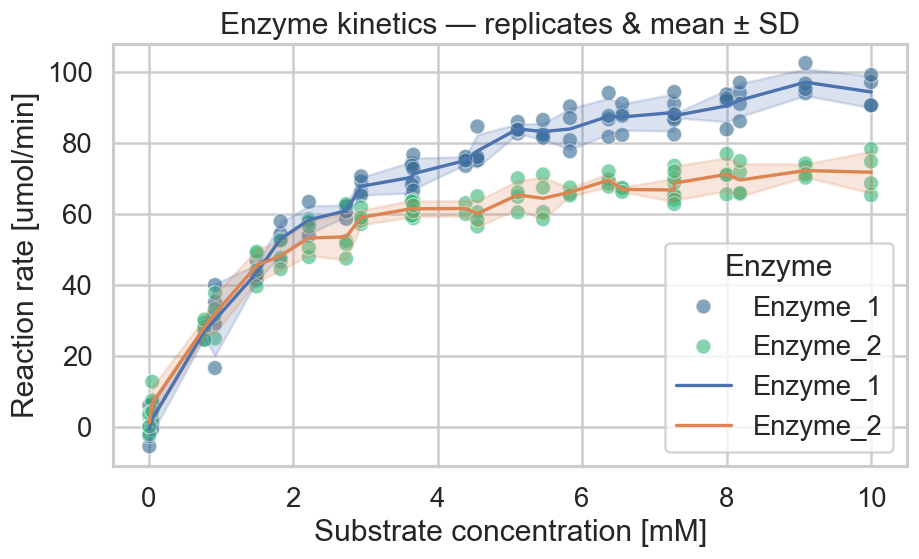

In [17]:
# Scatter + mean trend with uncertainty - 2 plots in one canvas

# custom_palette = sns.cubehelix_palette(start=.01, rot=1.4, dark=.9, light=0.3, n_colors=10)
plt.figure(figsize=(8,5))
sns.scatterplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', alpha=0.6,palette="viridis") #two categorical enzyme1 and enzyme 2
sns.lineplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', estimator='mean', errorbar='sd', lw=2)
plt.xscale('linear')
plt.xlabel('Substrate concentration [mM]')
plt.ylabel('Reaction rate [umol/min]')
plt.title('Enzyme kinetics — replicates & mean ± SD')
plt.legend(title='Enzyme')
plt.tight_layout()
plt.show()



#### TASK 1
- Play with different settings in the plot above to explore the different parameters.
- Apply a colour palette of choice


/var/folders/nm/01cqfvgn1655c0dthf5dhh900000gn/T/ipykernel_2920/2449947032.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', alpha=0.6,palette=custom_palette) #two categorical enzyme1 and enzyme 2


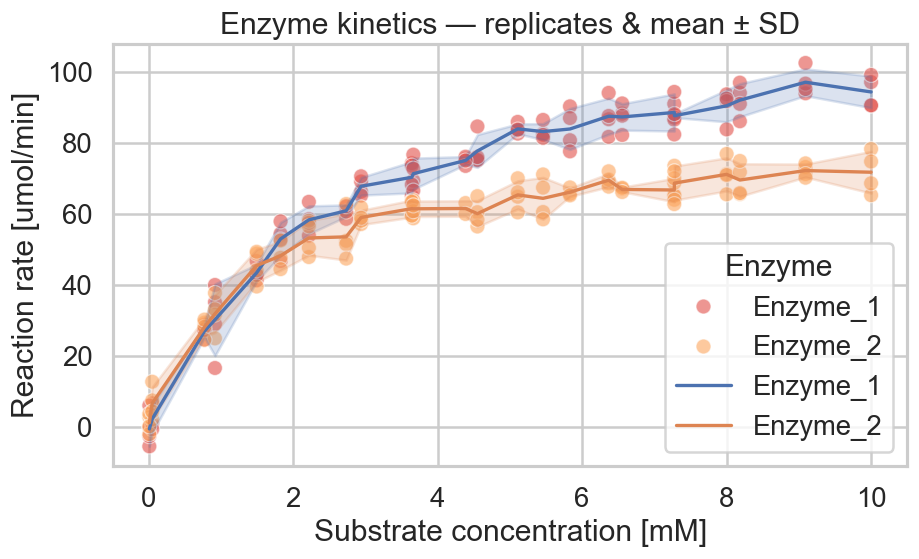

In [32]:

#custom_palette = sns.cubehelix_palette(start=.1, rot=1.4, dark=.1, light=0.3, n_colors=10)
custom_palette = sns.color_palette("Spectral")
plt.figure(figsize=(8,5))
sns.scatterplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', alpha=0.6,palette=custom_palette) #two categorical enzyme1 and enzyme 2
# here it is also the custom palette written
sns.lineplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate', hue='enzyme', estimator='mean', errorbar='sd', lw=2)
plt.xscale('linear')
plt.xlabel('Substrate concentration [mM]')
plt.ylabel('Reaction rate [umol/min]')
plt.title('Enzyme kinetics — replicates & mean ± SD')
plt.legend(title='Enzyme')
plt.tight_layout()
plt.show()

#### Task 2
- Replot the enzyme kinetics for each enzyme separately using `sns.relplot` with facet columns. You can pretty much use the line plot from above, simply define the column with the categorial value for which you want to separate the plots (keyword: col)
- Try `estimator='median'` and compare the median and mean curves.
- See what happens when you set an `aspect=2` and `height=4`

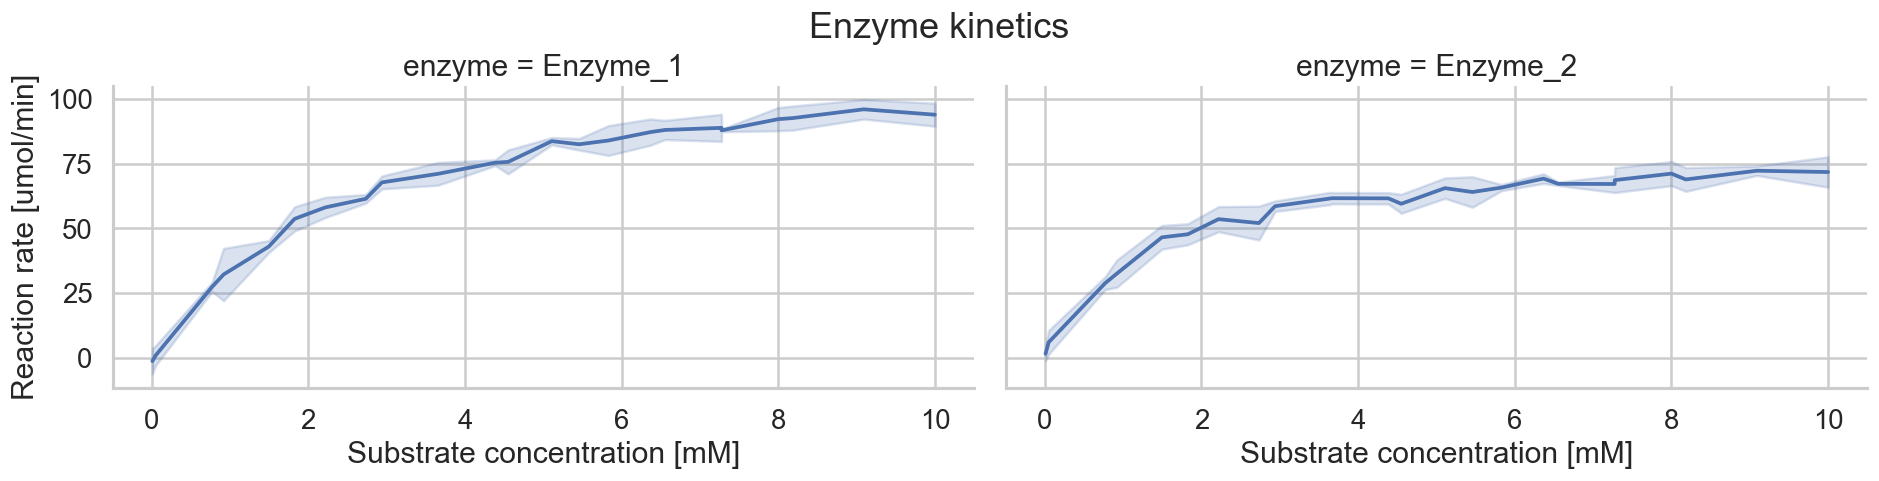

In [ ]:
relplot = sns.relplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate',
                col='enzyme', kind='line', estimator='median', errorbar='sd', aspect=2, height=4)
relplot.set_axis_labels('Substrate concentration [mM]', 'Reaction rate [umol/min]')
relplot.figure.suptitle('Enzyme kinetics', y=1.02)
plt.show()

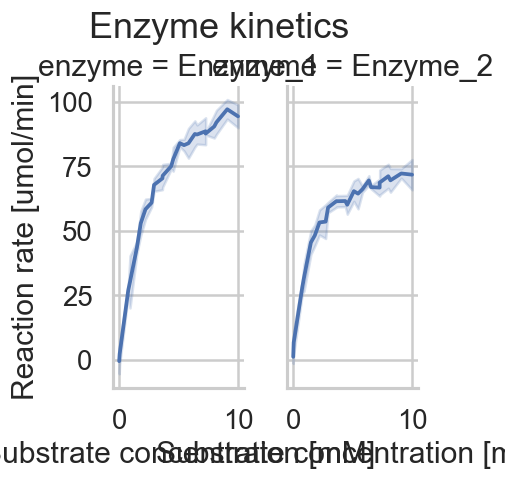

In [40]:
relplot = sns.relplot(data=enzyme_kinetics_df, x='substrate_mM', y='rate',
                col='enzyme', kind='line', estimator='mean', errorbar='sd', aspect=0.5, height=4) #see aspect is the issue here with the plt
relplot.set_axis_labels('Substrate concentration [mM]', 'Reaction rate [umol/min]')
relplot.figure.suptitle('Enzyme kinetics', y=1.02)
plt.show()

## Protein melting curve

In [36]:
protein_melting_df = pd.read_csv("protein_melting.csv")
protein_melting_df.head()

,protein,replicate,temp_C,fluorescence
0,WT,1,20.000000,16.266044
1,WT,1,22.586207,12.413287
2,WT,1,25.172414,15.946751
3,WT,1,27.758621,18.601542
4,WT,1,30.344828,18.847755


In [41]:
protein_melting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   protein       450 non-null    object 
 1   replicate     450 non-null    int64  
 2   temp_C        450 non-null    float64
 3   fluorescence  428 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.2+ KB


In [43]:
protein_melting_df.shape

(450, 4)

In [45]:
protein_melting_df.describe()

,replicate,temp_C,fluorescence
count,450.000000,450.000000,428.000000
mean,3.000000,57.500000,64.537935
std,1.415788,22.409676,41.595910
min,1.000000,20.000000,8.286653
25%,2.000000,38.103448,21.029255
50%,3.000000,57.500000,92.138226
75%,4.000000,76.896552,104.046030
max,5.000000,95.000000,119.639424


### Plot: multiple replicates (small multiples) and mean curve per protein
Show case for faceting & shaded CI.


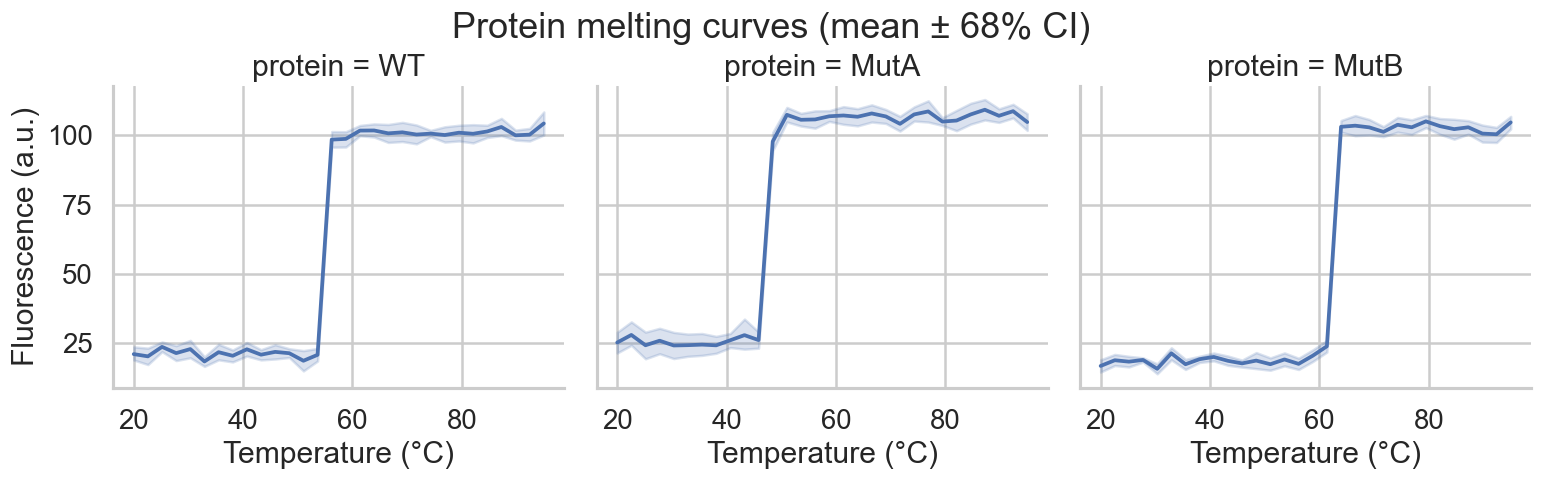

In [37]:
# Faceted line plots with CI
relplot = sns.relplot(data=protein_melting_df, x='temp_C', y='fluorescence',
                col='protein', kind='line', estimator='mean', errorbar=('ci',68), height=4, aspect=1.1)
relplot.set_axis_labels('Temperature (°C)', 'Fluorescence (a.u.)')
relplot.figure.suptitle('Protein melting curves (mean ± 68% CI)', y=1.02)
plt.show()


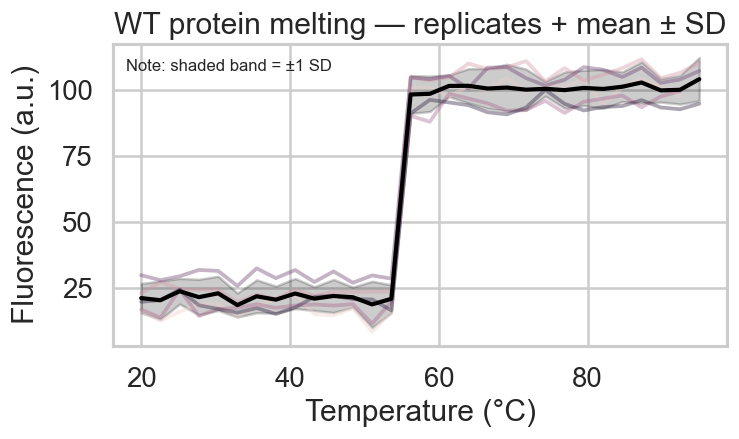

In [ ]:
# Example with custom styling and export
fig, ax = plt.subplots(figsize=(6.5,4)) 
#we do sub plt which means multiple plts in one or we could do them seperately
# plot WT melting curves with semi-transparent replicates

subset = protein_melting_df[protein_melting_df['protein'] == 'WT']
sns.lineplot(data=subset, x='temp_C', y='fluorescence', hue='replicate', estimator=None, alpha=0.4, legend=False, ax=ax)
# overlay mean curve
sns.lineplot(data=subset, x='temp_C', y='fluorescence', estimator='mean', errorbar='sd', lw=2.5, ax=ax, color='black')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title('WT protein melting — replicates + mean ± SD')
ax.text(0.02, 0.95, 'Note: shaded band = ±1 SD', transform=ax.transAxes, fontsize=10, va='top') # we can put a custom label like this code line here
fig.tight_layout()

plt.savefig("protein_plot.png",dpi=300,bbox_inches="tight")
plt.savefig("protein_plot.pdf",dpi=300,bbox_inches="tight")
plt.savefig("protein_plot.svg",bbox_inches="tight")

plt.show()


#### TASK 3
- Export the figure as PDF, SVG and PNG. Use the matplotlib function `savefig("name.format", dpi= x, bbox_inches="tight")`, and make sure to insert it befor the plot is shown.
- Compare file sizes and discuss when to use vector (SVG/PDF) vs raster (PNG).

In [ ]:
#do it before plt.show since other wise you get a blank export!!

<Figure size 768x576 with 0 Axes>

## Distribution plots & comparisons
Boxplot vs violin vs histogram — how to choose. We are going to use the wine dataset for this part.


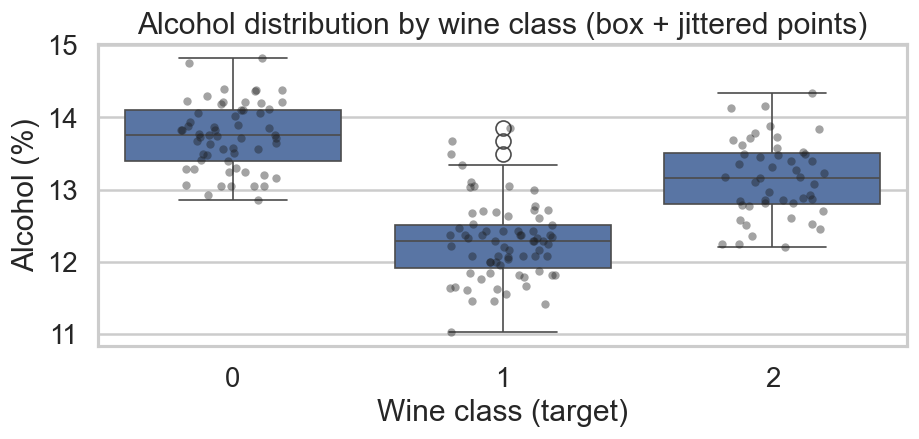

In [46]:
# Distribution comparisons using wine dataset
wine = datasets.load_wine(as_frame=True)
wine_df = wine.frame
wine_df['target'] = wine_df['target'].astype('category')  # convert to categorical

# Quick example: compare 'alcohol' distribution by class
plt.figure(figsize=(8,4))
sns.boxplot(data=wine_df, x='target', y='alcohol')
sns.stripplot(data=wine_df, x='target', y='alcohol', color='k', alpha=0.4, jitter=0.2)
plt.xlabel('Wine class (target)')
plt.ylabel('Alcohol (%)')
plt.title('Alcohol distribution by wine class (box + jittered points)')
plt.tight_layout()
plt.show()


#### TASK 4
- Recreate the same comparison using `sns.violinplot`. Which visual conveys sample skew or multimodality better?
- For `alcohol`, produce a histogram including a KDE (kernel density estimate). Explore different bandwidths for the kde (`bw_adjust=x`, try values from 0.1 to 2). You can put them in a subplot next to the histogram as a `sns.kdeplot`. Discuss the effect. When might a lower and higher bandwidth be aplicable?


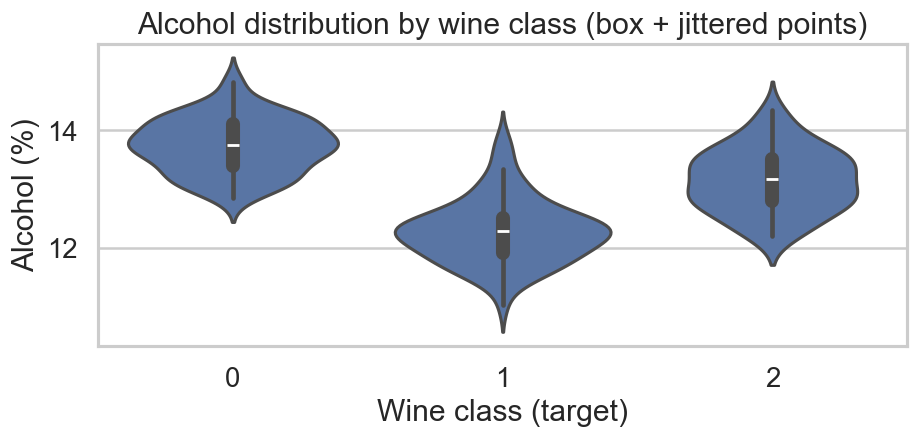

In [43]:
wine = datasets.load_wine(as_frame=True)
wine_df = wine.frame
wine_df['target'] = wine_df['target'].astype('category')  # convert to categorical

# Quick example: compare 'alcohol' distribution by class
plt.figure(figsize=(8,4))
sns.violinplot(data=wine_df, x='target', y='alcohol')
#sns.stripplot(data=wine_df, x='target', y='alcohol', color='k', alpha=0.4, jitter=0.2)
plt.xlabel('Wine class (target)')
plt.ylabel('Alcohol (%)')
plt.title('Alcohol distribution by wine class (box + jittered points)')
plt.tight_layout()
plt.show()

#violin plt shows us if the data is normally distributed or not


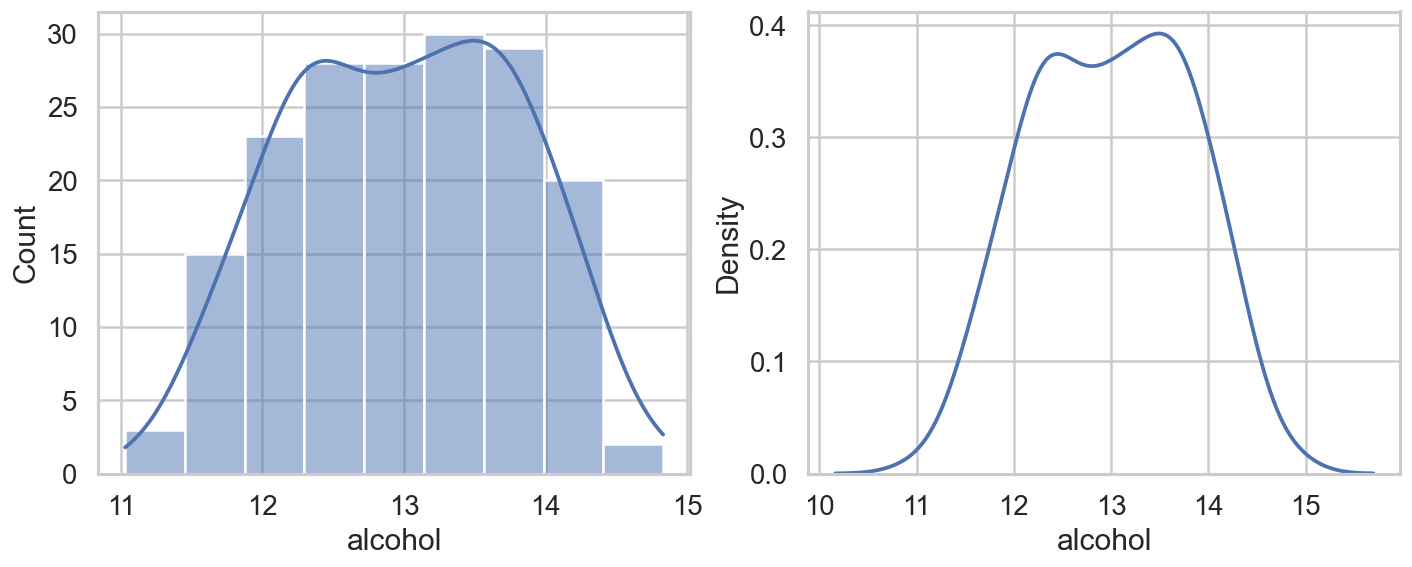

In [46]:
fig, ax = plt.subplots(1,2, figsize= (14,5)) #we define here a subplot
sns.histplot(wine_df["alcohol"], kde=True, ax=ax[0])
sns.kdeplot(wine_df["alcohol"], bw_adjust=1,ax=ax[1])
plt.show()

#### TASK 5
- Select a feature from the wine dataset and create a scatterplot. Use `viridis`, `cividis`, or `sns.color_palette("colorblind")` for accessible palettes.
- Avoid rainbow colormaps for continuous quantitative scales.
- Create a heatmap using the snippet below and choose an appropriate colourmap.

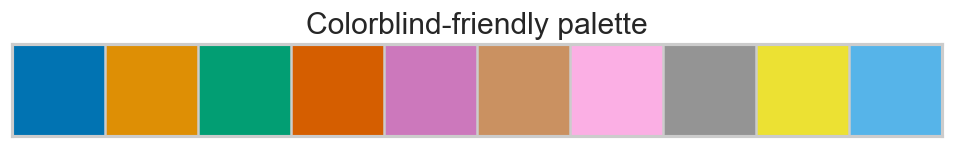

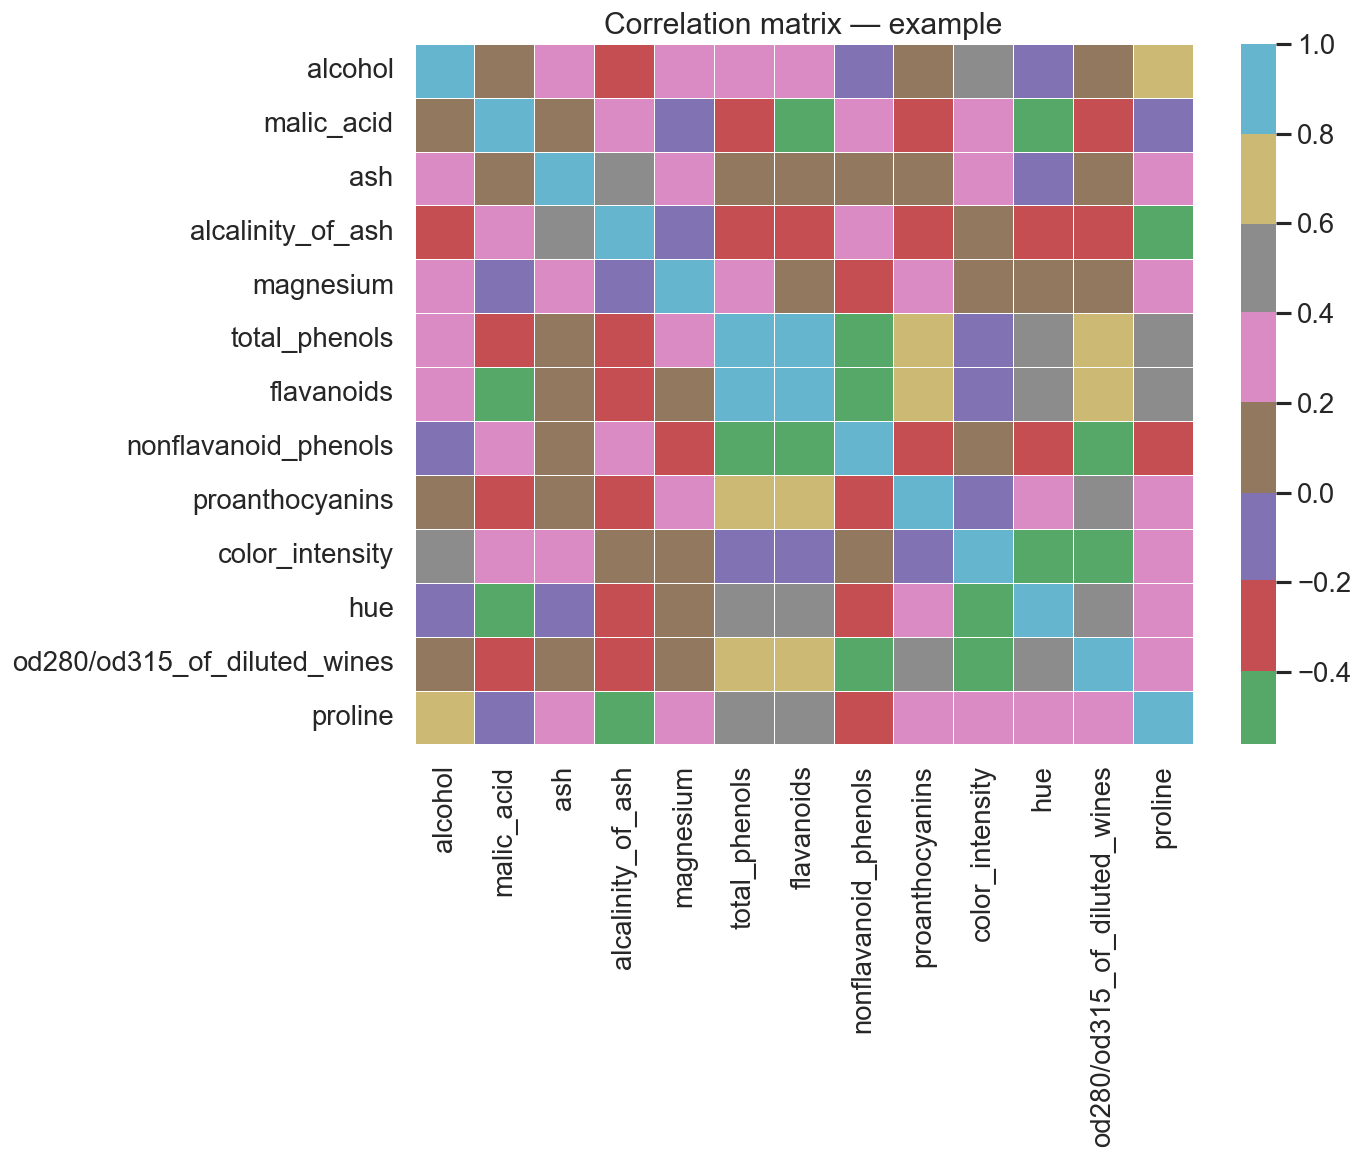

In [48]:
#Color palette examples
pal = sns.color_palette("colorblind")
sns.palplot(pal)
plt.title('Colorblind-friendly palette')
plt.show()



# Example: choose sequential colormap for heatmap
sample_corr = wine_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))

# define a colourmap
colourmap = sns.color_palette()

sns.heatmap(sample_corr, cmap=colourmap, center=0, linewidths=0.5)
plt.title('Correlation matrix — example')
plt.tight_layout()
plt.show()


## Final short exercise and wrap-up
Use the scatterplot from above and apply:
- good labels (axis, title, etc.) and units
- accessible colors

Additionally, think of a short caption (1–2 sentences) explaining what the plot shows


In [47]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [81]:
# plotting defaults for a presentation
# explore on the first graph how the plot changes when you switch the context to e.g. "paper" or "poster"
sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams['figure.dpi'] = 120

/var/folders/nm/01cqfvgn1655c0dthf5dhh900000gn/T/ipykernel_2920/417171492.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(wine_df,x="flavanoids",y="total_phenols", hue="target",
/var/folders/nm/01cqfvgn1655c0dthf5dhh900000gn/T/ipykernel_2920/417171492.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Wine Class", loc="lower right")


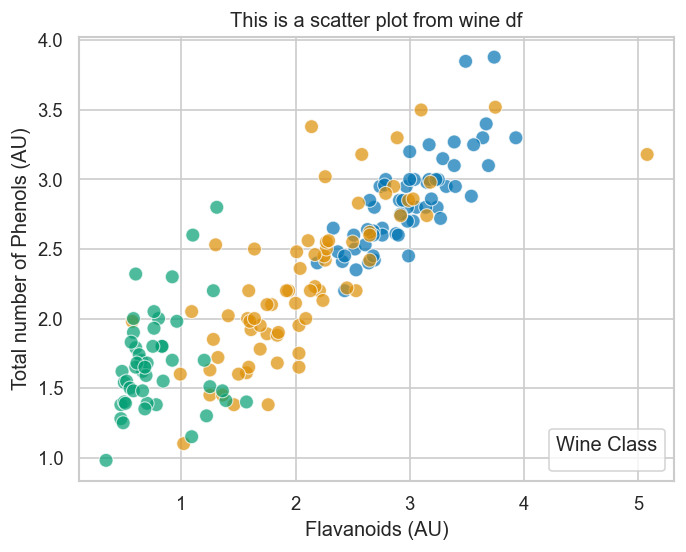

In [82]:
custom_palette = sns.color_palette("colorblind")

sns.scatterplot(wine_df,x="flavanoids",y="total_phenols", hue="target",           
    palette = custom_palette,   
    alpha=0.7,
    s=70, legend=None
)
plt.xlabel("Flavanoids (AU)")
plt.ylabel("Total number of Phenols (AU)")
plt.title("This is a scatter plot from wine df")
plt.legend(title="Wine Class", loc="lower right")
plt.show()